In [1]:
%matplotlib inline
from pathlib import Path

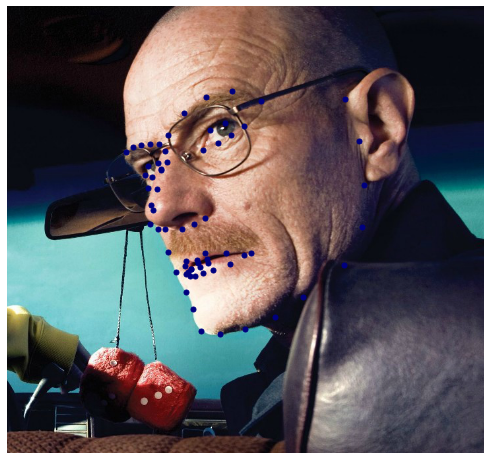

In [2]:
import menpo.io as mio
from menpo.visualize import print_progress

breakingbad = mio.import_builtin_asset.breakingbad_jpg()
breakingbad = breakingbad.crop_to_landmarks_proportion(0.5)
breakingbad.view_landmarks();

In [3]:
path_to_lfpw = Path('/home/manik/lfpw/')

In [4]:
import menpo.io as mio

training_images = []
# load landmarked images
for i in mio.import_images(path_to_lfpw / 'trainset', verbose=True):
    # crop image
    i = i.crop_to_landmarks_proportion(0.1)
    # convert it to greyscale if needed
    if i.n_channels == 3:
        i = i.as_greyscale(mode='luminosity')
    # append it to the list
    training_images.append(i)

Found 811 assets, index the returned LazyList to import.


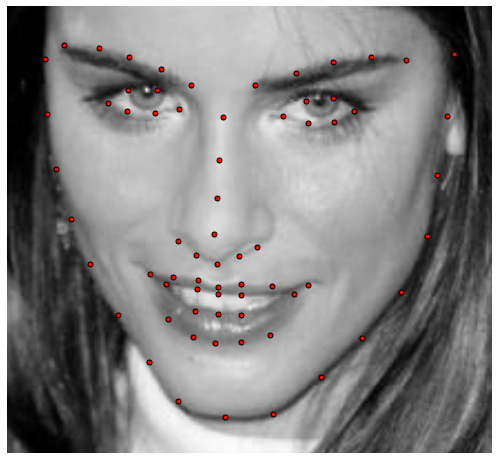

In [5]:
from menpowidgets import visualize_images
visualize_images(training_images)

In [6]:
from menpofit.aam import HolisticAAM
from menpo.feature import no_op

# build AAM
aam = HolisticAAM(
    training_images,
    group='PTS',
    verbose=True,
    holistic_features=no_op, 
    diagonal=120, 
    scales=1
)

- Computing reference shape                                                     Computing batch 0
- Building models
  - Warping images: [          ] 1% (15/811) - 00:00:04 remaining               

/home/manik/anaconda/lib/python2.7/site-packages/menpofit/builder.py:338: MenpoFitModelBuilderWarning: The reference shape passed is not a TriMesh or subclass and therefore the reference frame (mask) will be calculated via a Delaunay triangulation. This may cause small triangles and thus suboptimal warps.
  MenpoFitModelBuilderWarning)


  - Done
                                                                       

In [8]:
print aam

Holistic Active Appearance Model
 - Images scaled to diagonal: 120.00
 - Images warped with DifferentiablePiecewiseAffine transform
 - Scales: [1]
   - Scale 1
     - Holistic feature: no_op
     - Appearance model class: PCAModel
       - 810 appearance components
     - Shape model class: OrthoPDM
       - 132 shape components
       - 4 similarity transform parameters



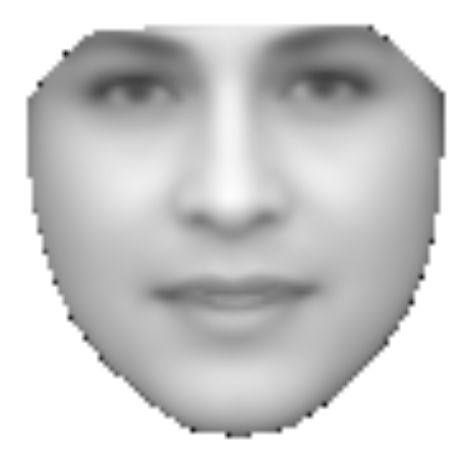

In [9]:
# using default parameters
aam.instance().view();

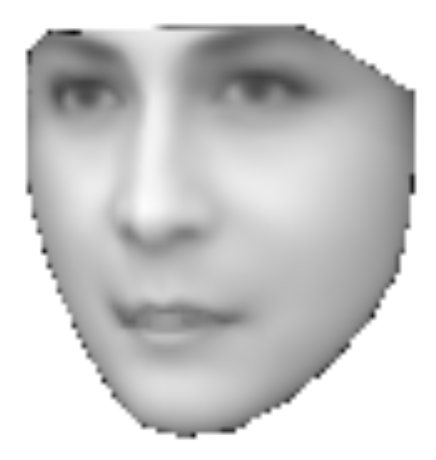

In [10]:
# varying shape parameters
aam.instance(shape_weights=[1.0, 0.5, -2.1]).view(new_figure=True);

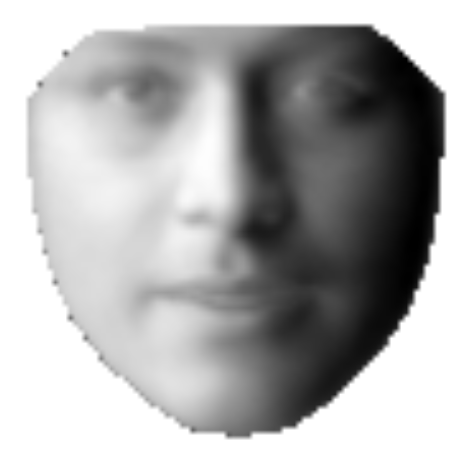

In [11]:
# varying appearance parameters
aam.instance(appearance_weights=[2.7, 3.5, 0.9]).view(new_figure=True);


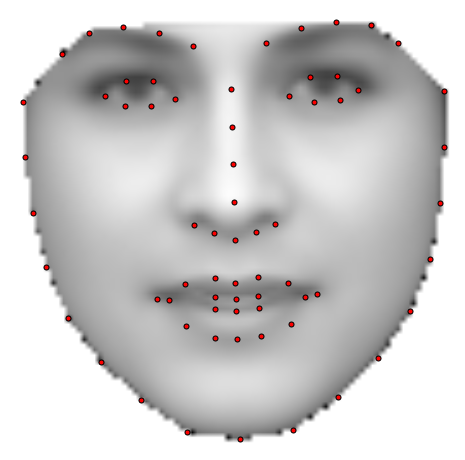

In [12]:
aam.view_aam_widget()

In [7]:
from menpofit.aam import LucasKanadeAAMFitter

# define Lucas-Kanade based AAM fitter
fitter = LucasKanadeAAMFitter(aam, n_shape=0.9, n_appearance=0.9)

In [8]:
# load test images
test_images = []
for i in mio.import_images(path_to_lfpw / 'testset', max_images=5, verbose=True):
    # crop image
    i = i.crop_to_landmarks_proportion(0.5)
    # convert it to grayscale if needed
    if i.n_channels == 3:
        i = i.as_greyscale(mode='luminosity')
    # append it to the list
    test_images.append(i)

Found 5 assets, index the returned LazyList to import.


In [15]:
from menpofit.fitter import noisy_shape_from_bounding_box
fitting_results = []
# fit images
for i in test_images:
    # obtain ground truth (original) landmarks
    gt_s = i.landmarks['PTS'].lms
    
    # generate initialization shape
    initial_s = noisy_shape_from_bounding_box(gt_s, gt_s.bounding_box())
    
    # fit image
    fr = fitter.fit_from_shape(i, initial_s, gt_shape=gt_s)
    fitting_results.append(fr)
    
    # print fitting error
    print(fr)

Fitting result of 68 landmark points.
Initial error: 0.0726
Final error: 0.0285
Fitting result of 68 landmark points.
Initial error: 0.0277
Final error: 0.0219
Fitting result of 68 landmark points.
Initial error: 0.0628
Final error: 0.0320
Fitting result of 68 landmark points.
Initial error: 0.0389
Final error: 0.0305
Fitting result of 68 landmark points.
Initial error: 0.0802
Final error: 0.0406


In [28]:
im = mio.import_image('/home/manik/images/messi3.jpg')
i = test_images[0]
gt_s = i.landmarks['PTS'].lms
initial_s = noisy_shape_from_bounding_box(gt_s, gt_s.bounding_box())
fr = fitter.fit_from_shape(im,initial_s)
print fr

Fitting result of 68 landmark points.


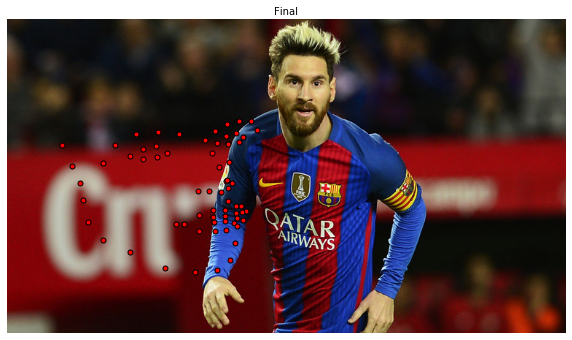

In [29]:
visualize_fitting_result(fr)

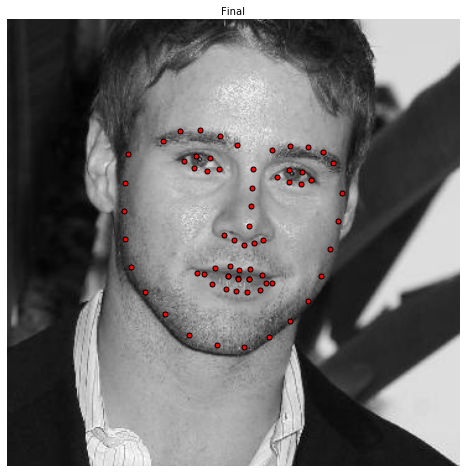

In [16]:
from menpowidgets import visualize_fitting_result

visualize_fitting_result(fitting_results)

In [21]:
import matplotlib.pyplot as plt

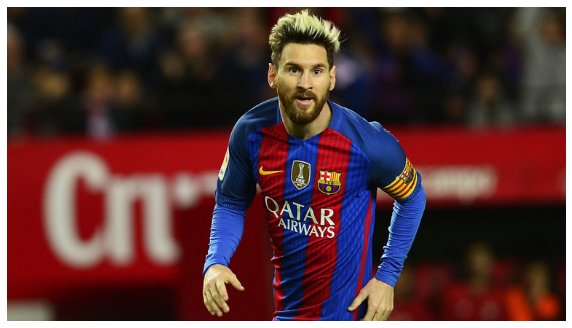

In [25]:
visualize_images(im)